In [1]:
import pandas as pd

In [2]:
#df = pd.read_csv('https://raw.githubusercontent.com/Jsoto0206/Dataholding/main/person_datatest2.csv')
df = pd.read_csv('https://raw.githubusercontent.com/Jsoto0206/Dataholding/main/person_datatest4.csv')
df.head(183) #this prints out the current data for google colab

,Weight,Sex,Age,Continent,Height Class
0,190,male,37,North America,6-
1,180,female,40,North America,5-
2,150,male,34,North America,5+
3,140,female,35,North America,5-
4,170,male,36,North America,5+
...,...,...,...,...,...
177,126,female,22,Africa,4-
178,141,male,21,Africa,5-
179,130,female,25,Africa,5-
180,136,male,19,Africa,4-


In [3]:
X = df[['Weight', 'Sex', 'Age', 'Continent']]
y = df['Height Class']

In [4]:
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Continent'] = X['Continent'].map({'Africa': 0, 'Antarctica': 1, 'Asia': 2, 'Australia': 3, 'Europe': 4, 'North America': 5, 'South America': 6})#antartica is a bit redundent but was used for tests

<ipython-input-4-63e963a25d28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
<ipython-input-4-63e963a25d28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Continent'] = X['Continent'].map({'Africa': 0, 'Antarctica': 1, 'Asia': 2, 'Australia': 3, 'Europe': 4, 'North America': 5, 'South America': 6})


this causes a scary error lol

<ipython-input-7-63e963a25d28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
<ipython-input-7-63e963a25d28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Continent'] = X['Continent'].map({'Africa': 0, 'Antarctica': 1, 'Asia': 2, 'Australia': 3, 'Europe': 4, 'North America': 5, 'South America': 6})

which is fine since we are tyring to slice the data frame 

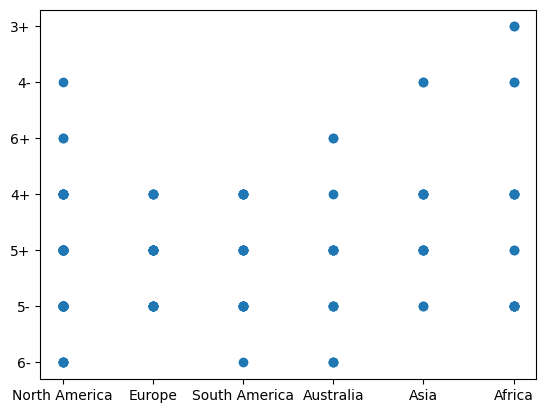

In [9]:
import matplotlib.pyplot as plt #this is used for data visualaizaton for colab
a = df['Continent']
b = df['Age']
plt.scatter(a, y)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split #divides the data for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
num = 5
knn = KNeighborsClassifier(n_neighbors=num) #this is where the magic happens
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          4+       0.62      0.56      0.59         9
          5+       0.65      0.65      0.65        20
          5-       0.57      0.63      0.60        19
          6-       1.00      0.50      0.67         2

    accuracy                           0.62        50
   macro avg       0.71      0.58      0.63        50
weighted avg       0.63      0.62      0.62        50

[[ 5  1  3  0]
 [ 1 13  6  0]
 [ 2  5 12  0]
 [ 0  1  0  1]]
